# Opgave DBSCAN

In deze opgave gaan we voor de verandering werken met de iris-dataset. We hebben hiervoor gekozen omdat het een fijne kleine en overzichtelijke dataset is en omdat deze inmiddels al voldoende is toegelicht.

Omdat we nu unsupervised te werk gaan, maken we geen gebruik van de `y`-vector. We willen kijken of we een [DBSCAN-model](https://scikit-learn.org/stable/modules/clustering.html#dbscan) kunnen maken dat de data in verschillende klassen kan classificeren. Om deze classificatie inzichtelijk te maken, hebben we een hulpfunctie `plot_dbscan` gemaakt, die je hieronder ziet staan. Bestudeer eventueel deze code om een beeld te krijgen van hoe hij werkt en wat de bedoeling is.

Run de onderstaande cel om de noodzakelijke imports uit te voeren.

In [37]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.cluster import DBSCAN

Run de onderstaande cel om de methode `plot_dbscan` te definiëren.

In [38]:
def plot_dbscan(model: DBSCAN, X: np.ndarray, **labels) -> None:
    core_mask = np.zeros_like(model.labels_, dtype=bool)
    core_mask[model.core_sample_indices_] = True
    anomalies_mask = model.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = model.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1], c=model.labels_[core_mask], marker='o', s=100, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], c=model.labels_[core_mask], marker='^', s=20, label='klasse')
    plt.scatter(anomalies[:, 0], anomalies[:, 1], c="r", marker="x", s=100, label='uitbijter')
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=model.labels_[non_core_mask], marker=".", label='non-core')
    
    x_str = '$x_1$' if not 'xlabel' in labels else labels['xlabel']
    y_str = '$x_2$' if not 'ylabel' in labels else labels['ylabel']
    plt.xlabel(x_str, fontsize=14)
    plt.ylabel(y_str, fontsize=14)
    plt.legend()
    plt.title(f"eps={model.eps:.2f}, min_samples={model.min_samples}", fontsize=14)

Laad de iris-dataset van uit `sklearn-datasets`. Zoals tijdens het theoriecollege is toegelicht zijn &epsilon; (`eps`) en het aantal samples in de omgeving van het gekozen datapunt de belangrijkste parameters van DBSCAN. Maak verschillende modellen met (in ieder geval) de onderstaande waarden voor deze parameters. Maak telkens een plot en registreer het aantal klassen, uitbijters en non-core observaties.

```
  min_samples: [3, 4, 5, 7, 9]
  eps{ [.1, .4, .55, .6, 1, 2]
```

Maak vervolgens een interessante visualisatie van deze gegevens om inzichtelijk te krijgen wat de effecten van de verschillende waarden voor deze parameters zijn. Kun je verklaren wat er gebeurt?

=== min_samples: 2 ===
m[2] e[0.10]: 8 core, 142 anomalies, 0 non-core, 4 classes
m[2] e[0.40]: 134 core, 16 anomalies, 0 non-core, 7 classes
m[2] e[0.55]: 146 core, 4 anomalies, 0 non-core, 4 classes
m[2] e[0.60]: 147 core, 3 anomalies, 0 non-core, 4 classes
m[2] e[1.00]: 150 core, 0 anomalies, 0 non-core, 2 classes
m[2] e[2.00]: 150 core, 0 anomalies, 0 non-core, 1 classes
=== min_samples: 3 ===
m[3] e[0.10]: 0 core, 150 anomalies, 0 non-core, 0 classes
m[3] e[0.40]: 121 core, 22 anomalies, 7 non-core, 4 classes
m[3] e[0.55]: 142 core, 6 anomalies, 2 non-core, 3 classes
m[3] e[0.60]: 144 core, 5 anomalies, 1 non-core, 3 classes
m[3] e[1.00]: 150 core, 0 anomalies, 0 non-core, 2 classes
m[3] e[2.00]: 150 core, 0 anomalies, 0 non-core, 1 classes
=== min_samples: 4 ===
m[4] e[0.10]: 0 core, 150 anomalies, 0 non-core, 0 classes
m[4] e[0.40]: 104 core, 25 anomalies, 21 non-core, 4 classes
m[4] e[0.55]: 135 core, 6 anomalies, 9 non-core, 3 classes
m[4] e[0.60]: 138 core, 5 anomalies, 7 non

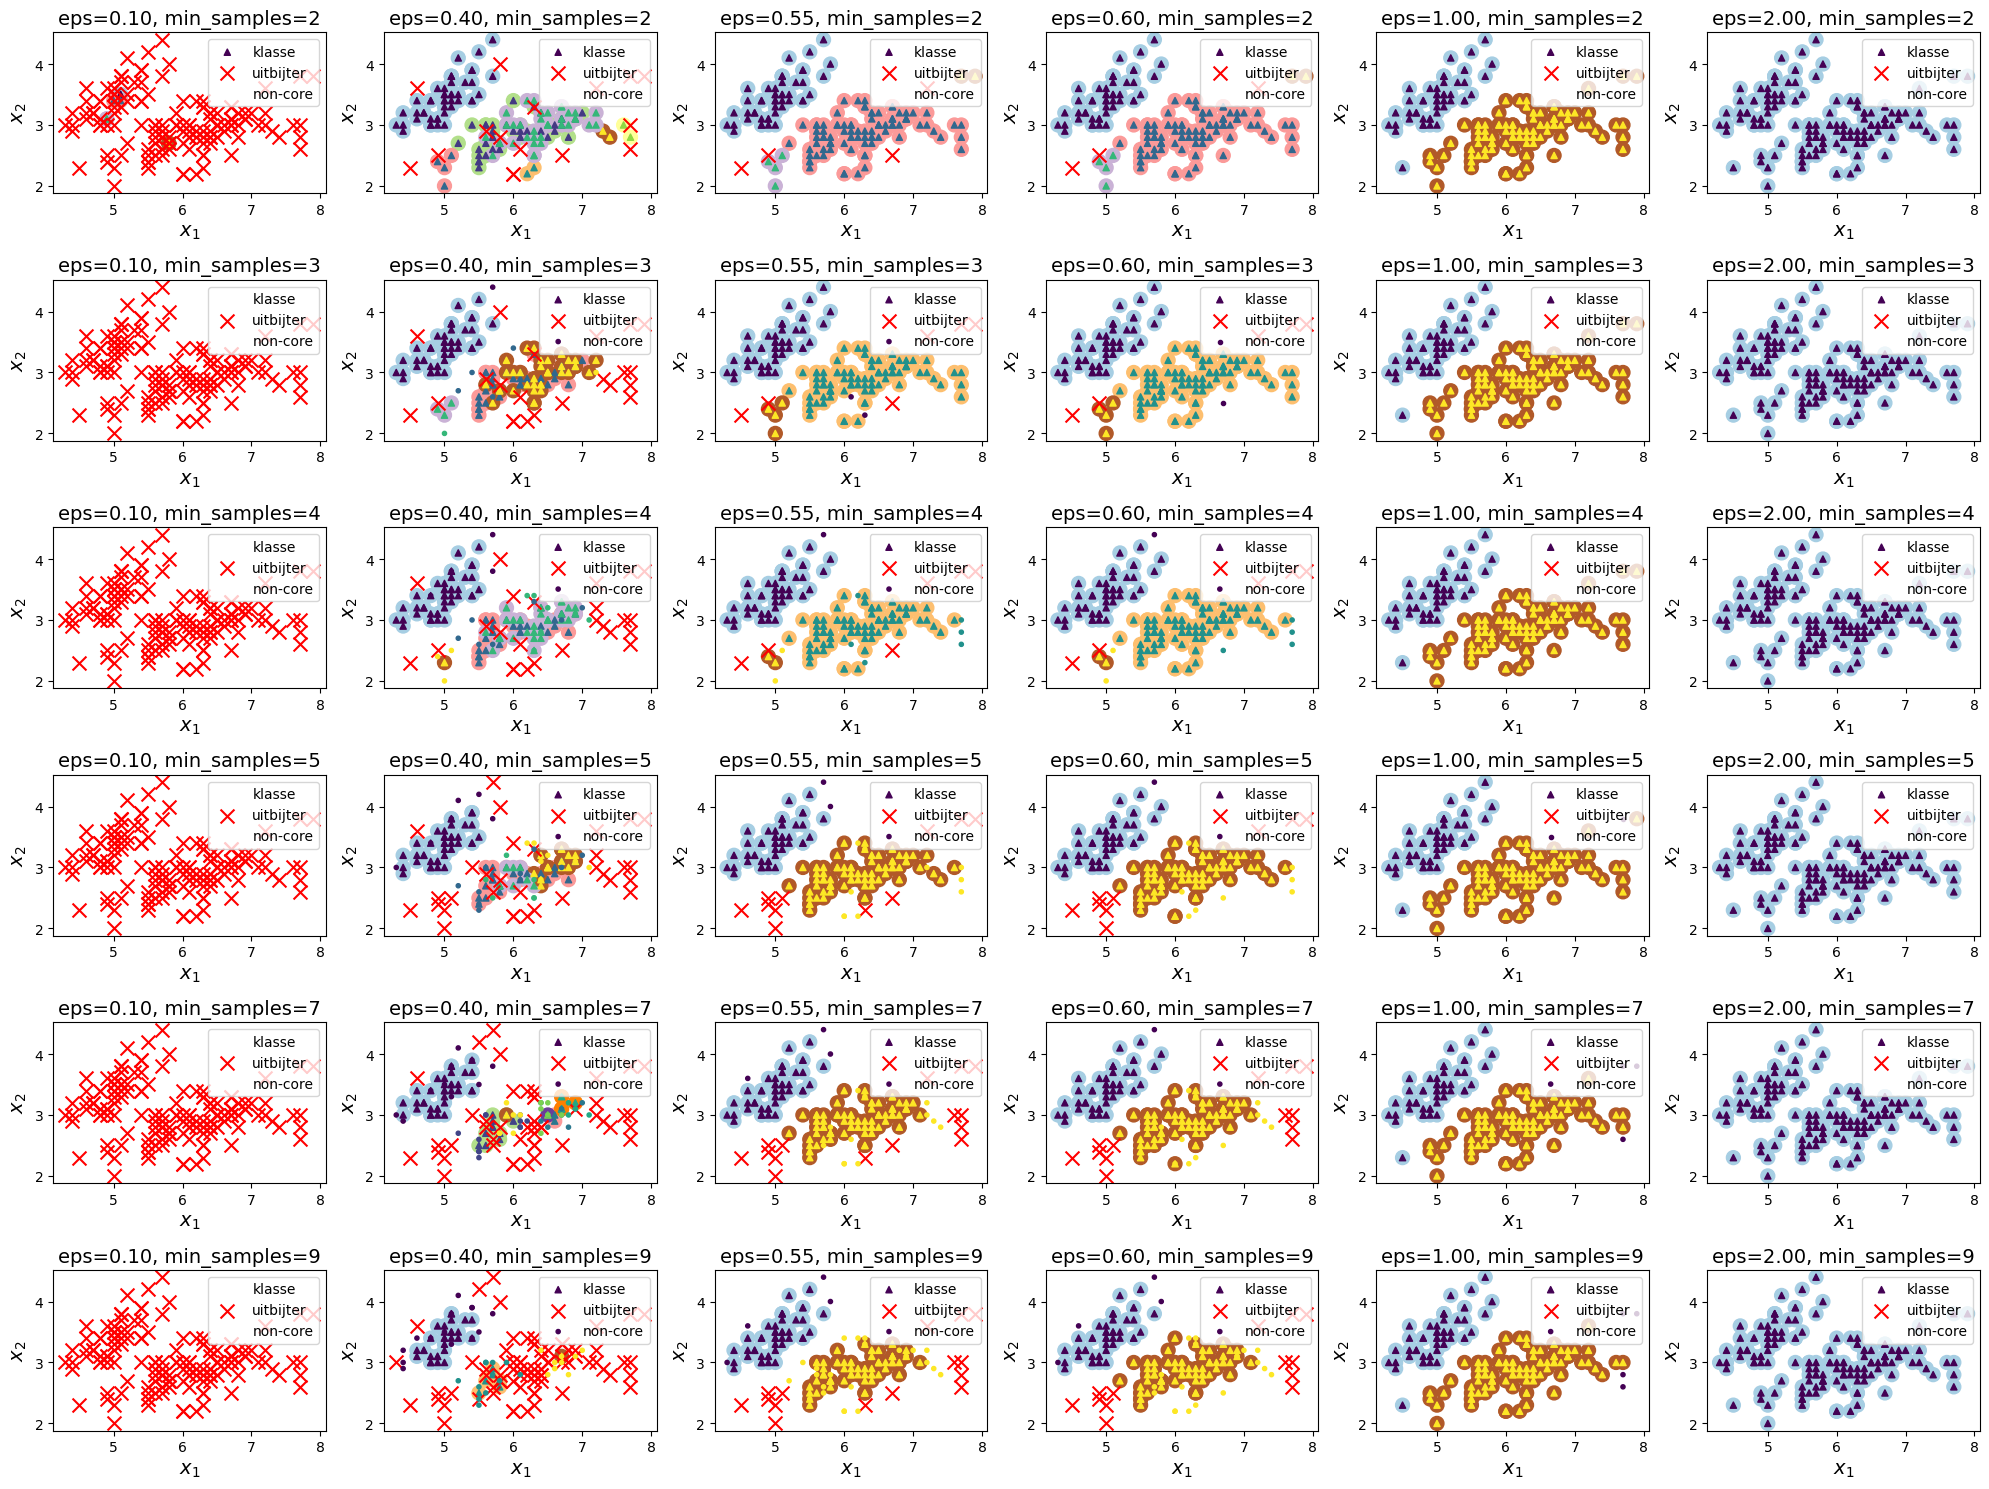

"\nDe visualisatie en de console output laten zien dat de waarden van 'eps' het grootste effect heeft.\nEen te lage waarde voor 'eps' zorgt ervoor dat veel punten als uitbijters worden aangemerkt. En een te hoge\nwaarde voor 'eps' zorgt ervoor dat veel punten in dezelfde klasse/cluster worden ingedeeld.\n\nDe waarde van 'min_samples' heeft ook invloed op het aantal klassen, maar dit effect is minder groot dan de waarde van 'eps'.\nDe optimale waardes zijn min_samples=3 en eps=0.60. Dit zorgt voor 3 unieke klassen/clusters, 5 uitbijters, en 1 non-core observatie.\n"

In [39]:
dataset = load_iris()
X = dataset.data

all_min_samples = [2, 3, 4, 5, 7, 9]
all_eps = [0.1, 0.4, 0.55, 0.6, 1.0, 2.0]

plt.figure(figsize=(20, 15))

for i, min_samples in enumerate(all_min_samples):
    print(f"=== min_samples: {min_samples} ===")

    for j, eps in enumerate(all_eps):
        model = DBSCAN(eps=eps, min_samples=min_samples)
        model.fit(X)

        plt.subplot(len(all_min_samples), len(all_eps), i * len(all_eps) + j + 1)
        plot_dbscan(model, X)
        
        # Print some information about the model
        n_core = len(model.core_sample_indices_)
        n_anomalies = np.sum(model.labels_ == -1)
        n_non_core = len(X) - n_core - n_anomalies
        
        n_classes = len(np.unique(model.labels_))
        if -1 in model.labels_:
            n_classes -= 1
        
        print(f"m[{min_samples}] e[{eps:.2f}]: {n_core} core, {n_anomalies} anomalies, {n_non_core} non-core, {n_classes} classes")

plt.tight_layout()
plt.show()

"""
De visualisatie en de console output laten zien dat de waarden van 'eps' het grootste effect heeft.
Een te lage waarde voor 'eps' zorgt ervoor dat veel punten als uitbijters worden aangemerkt. En een te hoge
waarde voor 'eps' zorgt ervoor dat veel punten in dezelfde klasse/cluster worden ingedeeld.

De waarde van 'min_samples' heeft ook invloed op het aantal klassen, maar dit effect is minder groot dan de waarde van 'eps'.
De optimale waardes zijn min_samples=3 en eps=0.60. Dit zorgt voor 3 unieke klassen/clusters, 5 uitbijters, en 1 non-core observatie.
"""
